In [3]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [4]:
current_dir = Path().cwd()
project_root = current_dir.parent.parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))
    print("Done")

Done


In [5]:
path = project_root / "data" / "cleaned_house_price_pred.csv"
data = pd.read_csv(str(path))

C:\Users\BIT\AppData\Local\Temp\ipykernel_132\3028449356.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(str(path))


In [4]:
X = data[['location', 'transaction', 'furnishing', 'Area', 'floor_ratio', 'parking_count', 'view_main_road', 'view_park',
       'view_pool', 'no_special_view', 'balcony_count', 'bathroom_count', 'is_gated_community', 'is_premium_brand', 'society_short']]

y = data["Amount_in_lacs"]

In [5]:
X = pd.get_dummies(X, columns=['location', 'transaction', 'furnishing', 'society_short'], drop_first=True)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [44]:
# Let's quikly check the performance
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=101, n_jobs=-1)

In [45]:
# Train
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",20
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [46]:
y_train_pred = rf_model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train))
r2_train = r2_score(y_pred=y_train_pred, y_true=y_train)
print(f"RMSE(train) Error: {rmse_train}\nr2_score(train): {r2_train}")

RMSE(train) Error: 16.005709461080553
r2_score(train): 0.9698045180804113


In [47]:
y_test_pred = rf_model.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_pred=y_test_pred, y_true=y_test))
r2_test = r2_score(y_pred=y_test_pred, y_true=y_test)
print(f"RMSE(test) Error: {rmse_test}\nr2_score(test): {r2_test}")

RMSE(test) Error: 26.207680029750804
r2_score(test): 0.9188859506313448


In [48]:
data.head()

,index,location,transaction,furnishing,facing,overlooking,society,bathroom,balcony,car_parking,...,parking_count,view_main_road,view_park,view_pool,no_special_view,balcony_count,bathroom_count,is_gated_community,is_premium_brand,society_short
0,0,thane,Resale,Unfurnished,Unknown,NaN,Srushti Siddhi Mangal Murti Complex,1,2.0,NaN,...,0,0,0,0,1,2,1,1,0,Other
1,1,thane,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,...,1,0,1,0,0,0,2,1,1,Other
2,2,thane,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,...,1,0,1,0,0,0,2,1,1,Other
3,4,thane,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,...,1,1,1,0,0,0,2,1,1,Other
4,5,thane,Resale,Unfurnished,East,"Garden/Park, Main Road",Virat Aangan,1,1.0,NaN,...,0,1,1,0,0,1,1,1,0,Other


In [49]:
X

,Area,floor_ratio,parking_count,view_main_road,view_park,view_pool,no_special_view,balcony_count,bathroom_count,is_gated_community,...,society_short_Onex Privy,society_short_Other,society_short_Rama Apartment,society_short_Rare Earth,society_short_Rosedale Garden,society_short_Sarve Satyam Apartment,society_short_Siddha Town,society_short_Team Taurus De Ja Vu,society_short_Unknown,society_short_Urban Heights
0,650.0,0.909091,0,0,0,0,1,2,1,1,...,False,True,False,False,False,False,False,False,False,False
1,614.9,0.136364,1,0,1,0,0,0,2,1,...,False,True,False,False,False,False,False,False,False,False
2,1012.7,0.344828,1,0,1,0,0,0,2,1,...,False,True,False,False,False,False,False,False,False,False
3,825.5,0.476190,1,1,1,0,0,0,2,1,...,False,True,False,False,False,False,False,False,False,False
4,680.0,0.285714,0,1,1,0,0,1,1,1,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140514,1953.0,0.500000,1,0,1,0,0,3,3,1,...,False,True,False,False,False,False,False,False,False,False
140515,1680.0,0.666667,1,1,1,0,0,0,3,1,...,False,True,False,False,False,False,False,False,False,False
140516,1625.0,0.333333,1,1,1,0,0,2,3,1,...,False,True,False,False,False,False,False,False,False,False
140517,709.0,1.000000,0,1,0,0,0,0,2,1,...,False,True,False,False,False,False,False,False,False,False


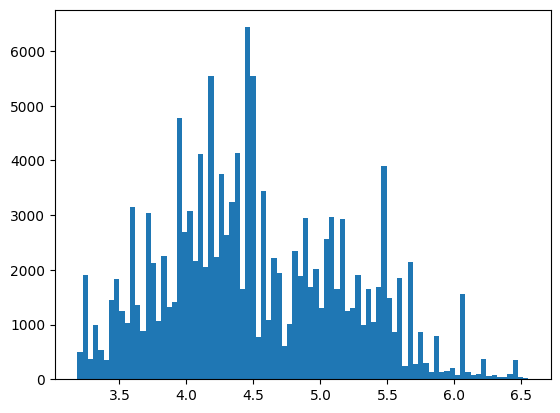

In [77]:
plt.hist(np.log1p(y), bins="auto");

In [22]:
X = data[['location', 'transaction', 'furnishing', 'Area', 'floor_ratio', 'parking_count', 'view_main_road', 'view_park',
       'view_pool', 'no_special_view', 'balcony_count', 'is_gated_community', 'is_premium_brand', 'society_short']]

y = data["Amount_in_lacs"]

In [23]:
X = pd.get_dummies(X, ['location', 'transaction', 'furnishing', 'society_short'], drop_first=True)

In [24]:
X["Area"] = np.log1p(X["Area"])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
lr_model = LinearRegression()
lr_model.fit(X_train, np.log1p(y_train))

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
y_train_pred = np.expm1(lr_model.predict(X_train))
rmse_train = np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train))
r2_train = r2_score(y_pred=y_train_pred, y_true=y_train)
print(f"RMSE train: {rmse_train}\nR2score train: {r2_train}")

RMSE train: 49.514375078413806
R2score train: 0.7110287003107467


In [13]:
def calc_vif(df: pd.DataFrame):
    df_numeric = df.select_dtypes(include=['float64', 'int64'])
    vif_data = pd.DataFrame()
    vif_data["features"] = df_numeric.columns
    
    vif_data["VIF"] = [variance_inflation_factor(df_numeric.values, i)
                for i in range(len(df_numeric.columns))]
    
    return vif_data.sort_values(by="VIF", ascending=False)

In [14]:
vif_scores = calc_vif(df=X)
print(vif_scores)

             features        VIF
0                Area  19.581897
6     no_special_view   6.811576
3      view_main_road   4.881379
7       balcony_count   4.578588
4           view_park   4.345919
1         floor_ratio   3.650431
2       parking_count   2.363573
8  is_gated_community   2.239246
5           view_pool   1.491689
9    is_premium_brand   1.102676


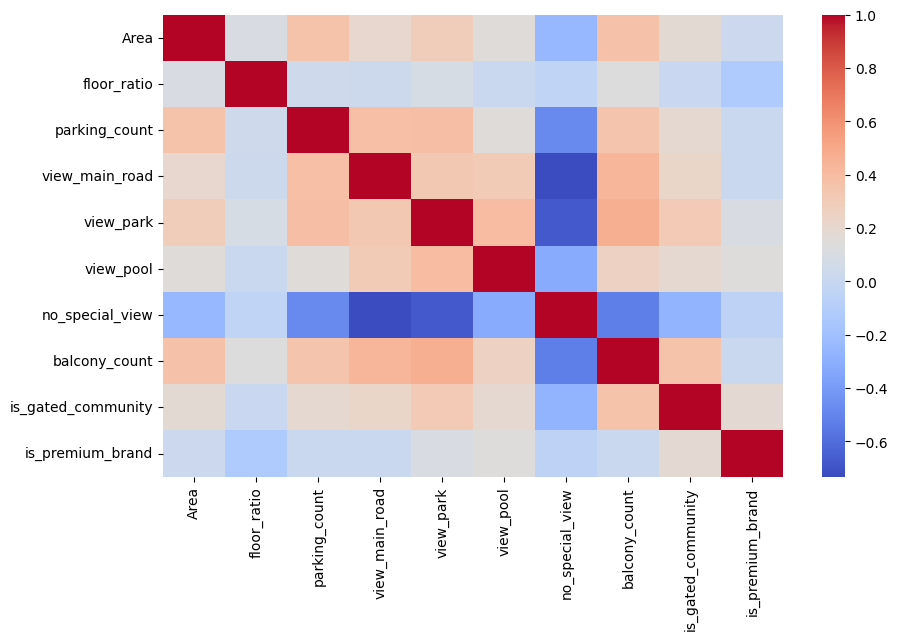

In [15]:
numeric_df = X.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()

In [16]:
errors = y_train_pred - y_train

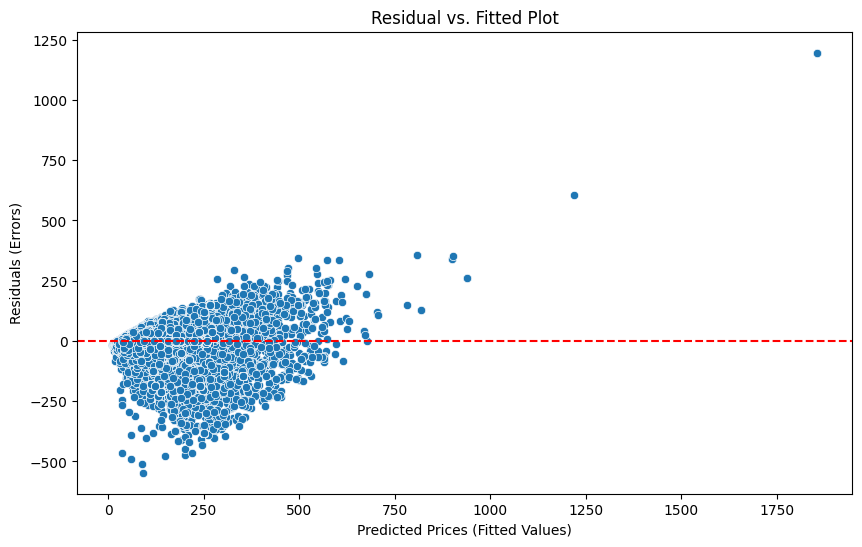

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y_train_pred, y=errors)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Prices (Fitted Values)')
plt.ylabel('Residuals (Errors)')
plt.title('Residual vs. Fitted Plot')
plt.show()

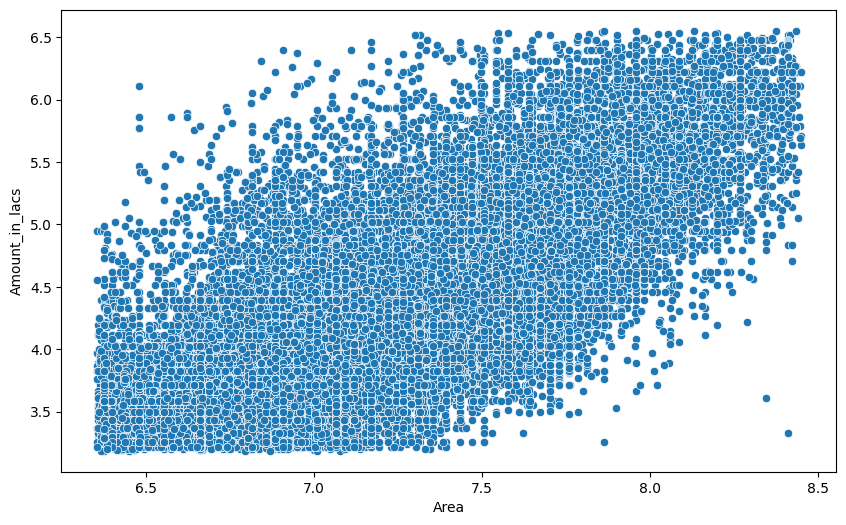

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X["Area"].sort_values(ascending=True), y=np.log1p(y).sort_values(ascending=True));

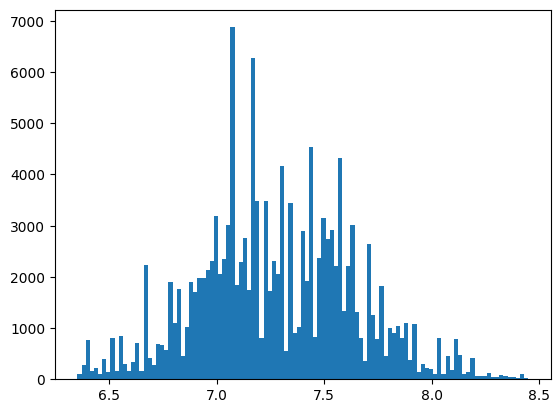

In [32]:
plt.hist(X["Area"], bins='auto');

Let's continue with tree based models

In [6]:
X = data[['location', 'transaction', 'furnishing', 'Area', 'floor_ratio', 'parking_count', 'view_main_road', 'view_park',
       'view_pool', 'no_special_view', 'balcony_count', 'bathroom_count', 'is_gated_community', 'is_premium_brand', 'society_short']]

y = data["Amount_in_lacs"]

In [7]:
X["Area"] = np.log1p(X["Area"])

C:\Users\BIT\AppData\Local\Temp\ipykernel_132\1938922737.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Area"] = np.log1p(X["Area"])


In [8]:
X = pd.get_dummies(X, columns=['location', 'transaction', 'furnishing', 'society_short'], drop_first=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [25]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=64, random_state=101, n_jobs=-1)

In [26]:
rf_model.fit(X=X_train, y=np.log1p(y_train))

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",500
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",64
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [28]:
y_train_pred = np.expm1(rf_model.predict(X_train))
rmse_train = np.sqrt(mean_squared_error(y_pred=y_train_pred, y_true=y_train))
r2_train = r2_score(y_pred=y_train_pred, y_true=y_train)
print(f"RMSE(train) Error: {rmse_train}\nr2_score(train): {r2_train}")

RMSE(train) Error: 10.79063280889949
r2_score(train): 0.986275834849707


In [29]:
y_test_pred = np.expm1(rf_model.predict(X_test))
rmse_test = np.sqrt(mean_squared_error(y_pred=y_test_pred, y_true=y_test))
r2_test = r2_score(y_pred=y_test_pred, y_true=y_test)
print(f"RMSE(test) Error: {rmse_test}\nr2_score(test): {r2_test}")

RMSE(test) Error: 25.76898379944179
r2_score(test): 0.9215787948501052


In [27]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]  ## If the number is an integer, then it is the actual quantity of samples,
                                             ## If it is a float, then it is the percentage of the dataset
max_depth_list = [2, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

In [ ]:
# from tqdm import tqdm
# rmse_train = []
# rmse_test = []
# r2_train = []
# r2_test = []
# for i in tqdm(range(len(com_est_dep))):
#     rf_model = RandomForestRegressor(
#         n_estimators=com_est_dep[i][0],
#         max_depth=com_est_dep[i][1],
#         n_jobs=-1,
#         max_features='log2',
#         random_state=101
#     )
#     rf_model.fit(X_train, np.log1p(y_train))
#     y_train_pred = np.expm1(rf_model.predict(X_train))
#     y_test_pred = np.expm1(rf_model.predict(X_test))
#     rmse_train.append(mean_squared_error(y_pred=y_train_pred, y_true=y_train))
#     r2_train.append(r2_score(y_pred=y_train_pred, y_true=y_train))
#     rmse_test.append(mean_squared_error(y_pred=y_test_pred, y_true=y_test))
#     r2_test.append(r2_score(y_pred=y_test_pred, y_true=y_test))

100%|██████████| 28/28 [03:10<00:00,  6.81s/it]


In [12]:
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, cv=5)
# grid_search.fit(X_train, np.log1p(y_train))